# Loadf the DOME 4.0 core ontology, 
this is the first step, we need to go through the entier ontologies and consolidate into an eco system

currently: 

1. the ontology is a patch work, no coherency,
2. EurosciVoc is not used !


## Tasks:
1. load the `~/dev/ontology/dome/Ontology-matters/dome4.0_core.ttl`
   - Working forlder: `~/dev/ontology/ontology_manager`
3. 


# Create initial Tier1 repository for DOME 4.0 

- [X] *Create data sets* create a ~ bunch (20-100) synthetic datasets according to the data set ontoly (Tier1) using "simphony-rdflib"
- [X] *Graph Data Base* store the datasets and the dome core ontology in a new ttl file (serialise to a file)
- [X] *Semantic query* run a sparql query e.g., search all by keyword, and search for all datasets by specific issued data, later also search datasets accessed by specific user. 
- [X] *Visualisation* for each results of query show graphs!
- [ ] *user access* create synthetic user data base for testing Provenance (based on ontology)
- [ ] *add each User as a data set to the ontology GDB. User Ontology - accessed, searches, etc.
- [ ] for each access of the user we create a Tier1 DS which is linked to the user and to the previous data set (time wise).
- [ ] simulate multiple user access, and populate the clearing/provenance
- [ ] show graphs for the use.  \
- [ ] demonstrate provenance for the cases of Tier 1 DS catalog changes, and by whome. show a graph of the changes!
- [ ] fetch real data records and fill a local Tier 1 DS, e.g. frim materials project
- [ ] same as above, do  SPARQL query for keyword etc, with result in graph mode.


Note: DomeDataSet from D3.6 is in /Users/adham/dev/dome/Ontology-matters/domeo/domeo.ttl


In [1]:
from ontology_manager.ontology_utils import OntologyManager
from rdflib import Graph, URIRef, Namespace, Literal, BNode, collection
from rdflib.namespace import SKOS, RDF, RDFS, OWL
from datetime import date

In [2]:
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph, rdflib_to_graphtool
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
from ontodot.ontodot import vis, random_date_time, auto_bind_namespaces, printH, generate_uuid, generate_random_materialproject_id
from ontodot.ontodot import OntoVis

In [4]:
from types import SimpleNamespace
import os, random

In [5]:
dome=SimpleNamespace()

In [6]:
dome.g=Graph(bind_namespaces="rdflib")
dome.ns=Namespace('https://dome40.eu/semantics/dome4.0_core#')
dome.path = "/Users/adham/dev/ontology/dome/Ontology-matters/"
#dome.file='dome4.0_core.ttl' # this is one of the orig files. 
dome.file='dome4.0_core_tbox.ttl'

In [7]:
mio=Graph(bind_namespaces="rdflib")
mio.parse("/Users/adham/dev/ontology/ontology_manager/MIO/mio/mio.ttl")

<Graph identifier=N7fecdff117c6401b9f0f0f6c600e124f (<class 'rdflib.graph.Graph'>)>

In [8]:
dome.g.parse(os.path.join(dome.path, dome.file))
# we could add it to mio_manager manually actually, then use it as we want, 

<Graph identifier=N8b7d22f271cf42dd9bd31a1bf491d7c8 (<class 'rdflib.graph.Graph'>)>

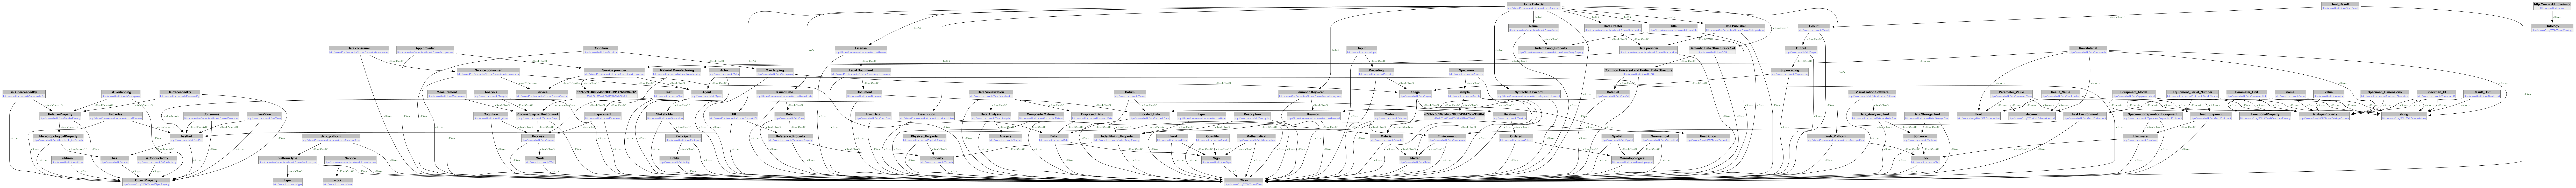

In [9]:
gg=dome.g + mio
vis(gg)

In [10]:
gc=dome.g+mio
ovis = OntoVis(gc)

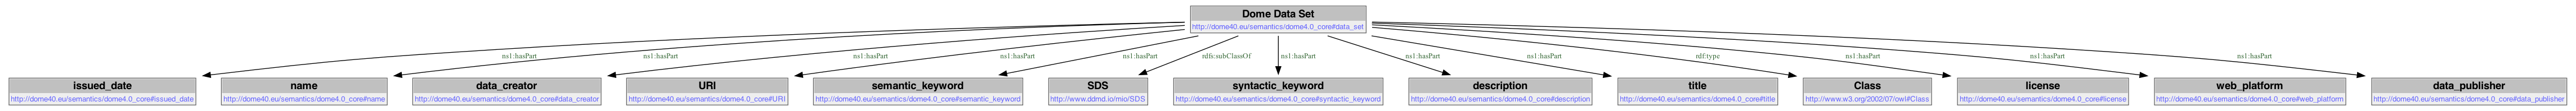

In [11]:
vis(ovis.zoom_in(URIRef("http://dome40.eu/semantics/dome4.0_core#data_set"), 2))

In [12]:
binds="""
@prefix domeES: <http://dome40.eu/semantics/dome4.0_core#> .
@prefix mio: <http://www.ddmd.io/mio/> .
@prefix dcat: <http://www.w3.org/ns/dcat#> .
@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix euroscivoc: <http://data.europa.eu/8mn/euroscivoc/> .
@prefix evmpo: <https://emmc.eu/semantics/evmpo/evmpo.ttl#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix http-meth: <http://www.w3.org/2011/http-methods#> .
@prefix msm: <http://iserve.kmi.open.ac.uk/ns/msm#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix skos: <http://www.w3.org/2004/02/skos/core#> .
@prefix xs: <http://www.w3.org/2001/XMLSchema#> .
"""


In [13]:
nsbinds=auto_bind_namespaces(dome.g, binds)

g.bind(domeES, http://dome40.eu/semantics/dome4.0_core#)
g.bind(mio, http://www.ddmd.io/mio/)
g.bind(dcat, http://www.w3.org/ns/dcat#)
g.bind(dcterms, http://purl.org/dc/terms/)
g.bind(euroscivoc, http://data.europa.eu/8mn/euroscivoc/)
g.bind(evmpo, https://emmc.eu/semantics/evmpo/evmpo.ttl#)
g.bind(foaf, http://xmlns.com/foaf/0.1/)
g.bind(http-meth, http://www.w3.org/2011/http-methods#)
g.bind(msm, http://iserve.kmi.open.ac.uk/ns/msm#)
g.bind(owl, http://www.w3.org/2002/07/owl#)
g.bind(rdf, http://www.w3.org/1999/02/22-rdf-syntax-ns#)
g.bind(rdfs, http://www.w3.org/2000/01/rdf-schema#)
g.bind(skos, http://www.w3.org/2004/02/skos/core#)
g.bind(xs, http://www.w3.org/2001/XMLSchema#)


In [14]:
print(nsbinds)

{'domeES': Namespace('http://dome40.eu/semantics/dome4.0_core#'), 'mio': Namespace('http://www.ddmd.io/mio/'), 'dcat': Namespace('http://www.w3.org/ns/dcat#'), 'dcterms': Namespace('http://purl.org/dc/terms/'), 'euroscivoc': Namespace('http://data.europa.eu/8mn/euroscivoc/'), 'evmpo': Namespace('https://emmc.eu/semantics/evmpo/evmpo.ttl#'), 'foaf': Namespace('http://xmlns.com/foaf/0.1/'), 'http-meth': Namespace('http://www.w3.org/2011/http-methods#'), 'msm': Namespace('http://iserve.kmi.open.ac.uk/ns/msm#'), 'owl': Namespace('http://www.w3.org/2002/07/owl#'), 'rdf': Namespace('http://www.w3.org/1999/02/22-rdf-syntax-ns#'), 'rdfs': Namespace('http://www.w3.org/2000/01/rdf-schema#'), 'skos': Namespace('http://www.w3.org/2004/02/skos/core#'), 'xs': Namespace('http://www.w3.org/2001/XMLSchema#')}


In [15]:
cuds=SimpleNamespace()
cuds.g=Graph()
cuds_collection=set()

In [16]:
num_data_sets=10
domeES=nsbinds['domeES']
mioNS=nsbinds['mio']

# connecting semantically value to an entity efficiently 
## We avoid multiplication of relation entities and concept entities with the cost of increased (semantic) verbosity. 
e.g. instead of saying 

        `a data set` hasDate `2024-03-19 13:43:32.991488'(Literal)` 
        
        we say: 
        
        `a data set` hasPart 'a Date` 
        'a Date`  hasValue `2024-03-19 13:43:32.991488'(Literal)` 

        `a somethin` is an instance, i.e., a particular. 

        We can make an utility "macro" that takes: 
        1. a class instance (s) 
        2. a class instance relating to a property (p) (Date, Color, etc.0 
        3. the value (v) of the property, and composes:

        add_property(s,p,v):
            g.add(s, hasPart, p) 
            g.add(p, hasValye, v)
        
        Another utility is to create an individual (instance) of certain type providing hte name (IRI) and the type class: 

        s= create_class(name:URIref, type: Class)

In [17]:
random_creator = lambda: random.choice(["Amit Bhave", "Silvia Chiacchiera", "Bjorn Tore", "Owain Baynon", "Adham Hashibon"])  # these will be instances later of a User/Dataproider etc. 
random_publisher = lambda: random.choice(["CMCL", "FRAUNHOFER", "SINTEF", "BOSCH", "SIEMENS", "Nature Scientific Data", "MaterialsProject.prg"])  # these will be instances later of a User/Dataproider etc. 
random_keywords = lambda k: random.sample(s.split('\n'), random.randint(3, 6))

# Use <span style="color:red;"> EuroSciVoc </span> as True Semantic keywords! 
- Load the EuroSciVoc ontology (mostly individuals, but with cler hierarchy)
- Use SPARQL to pick all the concepts that are relevant for [engineering and technology](https://op.europa.eu/en/web/eu-vocabularies/concept/-/resource?uri=http://data.europa.eu/8mn/euroscivoc/64605fff-1946-4fd4-b021-e2e83b71dcac&lang=en)
- for the demo: Make a function to select randomly 1 to 5 such semantic keywords, and add it to the dataset.

### **Note** we add the entier keywords directly, i.e. we reuse it as is, with all supported languages etc. this is probably an overkill but shows how we can attain complete practical and real <span style="color:green;"> compliane, and in fact use of European Infrastrcutre and investments</span>.
  

In [18]:
esvoc = SimpleNamespace()
esvoc.g = Graph()
esvoc.desc = "the EuroSciVoc"
esvoc.path = "/Users/adham/dev/dome/Ontology-matters/external/EuroSciVoc-skos-ap-eu_1.3.ttl" # Once we find and end point, we can get this from teh net directly. 
esvoc.g.parse(esvoc.path)
# SPARQL query to choose all elements narrower than engineering and technology. 
q="""
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?narrowerConcept ?narrowerLabel 
WHERE {
    ?narrowerConcept skos:broader+ <http://data.europa.eu/8mn/euroscivoc/64605fff-1946-4fd4-b021-e2e83b71dcac> .
    ?narrowerConcept skos:prefLabel ?narrowerLabel .
        FILTER(LANGMATCHES(LANG(?narrowerLabel), "en"))
}
"""
# Noe the UUID may change between versions,  need to confirm! 

In [19]:
# run the query 
esvoc.r = esvoc.g.query(q)

In [20]:
#for i in esvoc.r:
#    print(i)
printH(f" We find {len(esvoc.r)} semantic keywords relevant for technology and engineering")

 We find 208 semantic keywords relevant for technology and engineering:


In [21]:
esvoc.r_formated = [{'IRI': str(row.narrowerConcept), 'Label': str(row.narrowerLabel)} for row in esvoc.r]
esvoc.random = lambda r: random.sample([[r_['IRI'], r_['Label']] for r_ in r], random.randint(2, 6))
for i in range(3):
    print(esvoc.random(esvoc.r_formated))

[['http://data.europa.eu/8mn/euroscivoc/c835a32d-04c8-493b-9644-203414287c92', 'composites'], ['http://data.europa.eu/8mn/euroscivoc/3ed53afc-0fa6-49e8-be2d-215044c9a85a', 'coal'], ['http://data.europa.eu/8mn/euroscivoc/8f03620d-c94b-44d7-9778-a2f7bd325414', 'railroad engineering']]
[['http://data.europa.eu/8mn/euroscivoc/1d567f6c-e6c1-4742-8d45-dad617ef0dfd', 'control systems'], ['http://data.europa.eu/8mn/euroscivoc/742439ad-5d62-4e2d-bd77-0eb7caaa75f4', 'medical engineering']]
[['http://data.europa.eu/8mn/euroscivoc/b0acefb3-6602-42b2-a6dc-28f3629c31ae', 'product engineering'], ['http://data.europa.eu/8mn/euroscivoc/2643fcd4-b9dd-4fc3-9afc-d96632d62fb9', 'satellite technology'], ['http://data.europa.eu/8mn/euroscivoc/d913bd42-e79c-46a7-8714-14f2a6a0d82f', 'radio technology'], ['http://data.europa.eu/8mn/euroscivoc/325a846e-9c47-4aca-9358-5c8facd2e812', 'electrical engineering, electronic engineering, information engineering'], ['http://data.europa.eu/8mn/euroscivoc/4149c404-cb51-4f7

In [22]:
for i in range(1, num_data_sets + 1):

    cuds.ds = URIRef(f"{domeES}DS_{i}")
    cuds.g.add((cuds.ds, RDF.type, domeES.data_set))
    
    # Add the required DOME 4.0 Data Set Ontology attributes
    # These are cuds.add(spo triplet)
    # cuds.uri = URIRef(f"http://materialsproject.org/data/calc_{i}")

    mpid=generate_random_materialproject_id()
    #uri = URIRef("https://next-gen.materialsproject.org/materials/mp-19149")
    uri=URIRef(f"https://next-gen.materialsproject.org/materials/{mpid}")
    cuds.g.add( (uri, RDF.type, domeES.URI) ) 
    cuds.g.add((cuds.ds, domeES.hasPart, uri))
    
    printH(f"this is a DOME 4.0 Data Set: {cuds.ds}")
    printH(f"this Data Set point to: {uri}")

    wp = URIRef("https://next-gen.materialsproject.org/")
    cuds.g.add( (wp, RDF.type, domeES.web_platform) ) 
    cuds.g.add((cuds.ds, domeES.hasPart, wp))

    dc = URIRef(f"{domeES}/{generate_uuid()}")
    cuds.g.add( (dc, RDF.type, domeES.issued_date) )    
    the_date=Literal(random_date_time())
    cuds.g.add( (cuds.ds, domeES.hasPart, dc) )
    cuds.g.add( (dc, mioNS.hasValue, the_date) ) 

    dc = URIRef(f"{domeES}/{generate_uuid()}")
    cuds.g.add( (dc, RDF.type, domeES.description) )    
    the_value=Literal("This is a description that will change later")
    cuds.g.add( (cuds.ds, domeES.hasPart, dc) )
    cuds.g.add( (dc, mioNS.hasValue, the_value) )

    dc = URIRef(f"{domeES}/{generate_uuid()}")
    cuds.g.add( (dc, RDF.type, domeES.data_creator) )    
    the_value=Literal(random_creator())
    cuds.g.add( (cuds.ds, domeES.hasPart, dc) )
    cuds.g.add( (dc, mioNS.hasValue, the_value) )

    dc = URIRef(f"{domeES}/{generate_uuid()}")
    cuds.g.add( (dc, RDF.type, domeES.license) )    
    the_value=Literal("CC-BY 4.0")
    cuds.g.add( (cuds.ds, domeES.hasPart, dc) )
    cuds.g.add( (dc, mioNS.hasValue, the_value) )


    dc = URIRef(f"{domeES}/{generate_uuid()}")
    cuds.g.add( (dc, RDF.type, domeES.data_publisher) )    
    the_value=Literal(random_publisher())
    cuds.g.add( (cuds.ds, domeES.hasPart, dc) )
    cuds.g.add( (dc, mioNS.hasValue, the_value) )

    dc = URIRef(f"{domeES}/{generate_uuid()}")
    cuds.g.add( (dc, RDF.type, domeES.title) )    
    the_value=Literal("this is a title placeholder")
    cuds.g.add( (cuds.ds, domeES.hasPart, dc) )
    cuds.g.add( (dc, mioNS.hasValue, the_value) )


    # get some semantic EUROSCIVOC keywords for demo 
    ks=esvoc.random(esvoc.r_formated)
    for k in ks:
        print(k[1])
        dc = URIRef(k[0])
        cuds.g.add( (dc, RDF.type, domeES.semantic_keyword) )    
        cuds.g.add( (dc, RDFS.label, Literal(k[1]) ))    
        cuds.g.add( (cuds.ds, domeES.hasPart, dc) )
        
   # g.add((data_set_uri, mio.hasPart, domeES.syntactic_keyword))
    

this is a DOME 4.0 Data Set: http://dome40.eu/semantics/dome4.0_core#DS_1:
this Data Set point to: https://next-gen.materialsproject.org/materials/mp-132:
4G
cognitive radio
environmental biotechnology
this is a DOME 4.0 Data Set: http://dome40.eu/semantics/dome4.0_core#DS_2:
this Data Set point to: https://next-gen.materialsproject.org/materials/mp-153:
industrial biotechnology
energy and fuels
biochemical engineering
this is a DOME 4.0 Data Set: http://dome40.eu/semantics/dome4.0_core#DS_3:
this Data Set point to: https://next-gen.materialsproject.org/materials/mp-176:
electric power transmission
nanocrystals
two-dimensional nanostructures
transportation engineering
this is a DOME 4.0 Data Set: http://dome40.eu/semantics/dome4.0_core#DS_4:
this Data Set point to: https://next-gen.materialsproject.org/materials/mp-171:
medical engineering
power engineering
industrial biotechnology
liquid fuels
biochemical engineering
this is a DOME 4.0 Data Set: http://dome40.eu/semantics/dome4.0_core

### Any data set (given as a URIRef or URI in general) can and is a DOME 4.0 Data Set, this is simple achieved with the following line:

```
g.add((someURI, RDF.type, domeES.data_set))

```

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.607561 to fit



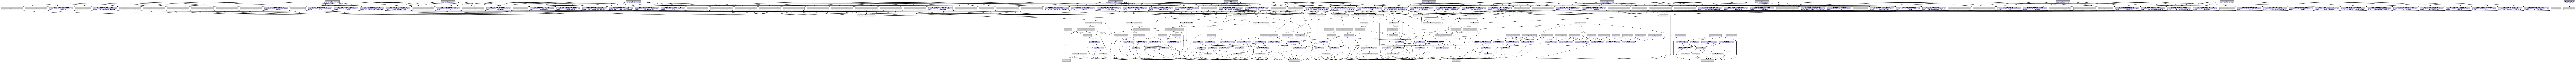

In [23]:
vis(cuds.g+dome.g+mio)

In [24]:
gc=cuds.g+dome.g+mio
ovis = OntoVis(gc)

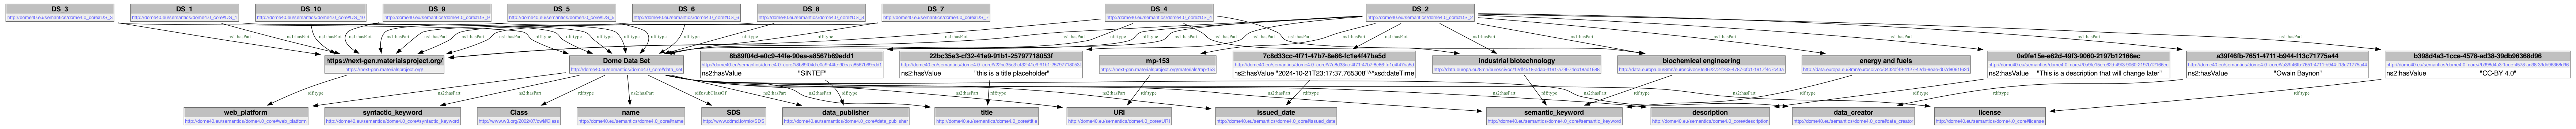

In [29]:
vis(ovis.zoom_in(URIRef("http://dome40.eu/semantics/dome4.0_core#DS_2"), 3))

In [26]:
inspect_iri=URIRef("http://dome40.eu/semantics/dome4.0_core#DS_2")
q="""
SELECT ?predicate ?object
WHERE {
    <http://dome40.eu/semantics/dome4.0_core#DS_2> ?predicate ?object .
}
"""
DS99 = Graph()
r=gc.query(q)
for i in r:
    DS99.add((inspect_iri, i.predicate, i.object))
    q2 = f"""
    SELECT ?predicate ?object
    WHERE {{
        <{i.object}> ?predicate ?object .
    }}
    """
    r2 = gc.query(q2)
    for j in r2:
        DS99.add((j.object, j.predicate, j.object))
        print(j.object, j.predicate, j.object)

http://dome40.eu/semantics/dome4.0_core#data_publisher http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://dome40.eu/semantics/dome4.0_core#data_publisher
SINTEF http://www.ddmd.io/mio/hasValue SINTEF
energy and fuels http://www.w3.org/2000/01/rdf-schema#label energy and fuels
http://dome40.eu/semantics/dome4.0_core#semantic_keyword http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://dome40.eu/semantics/dome4.0_core#semantic_keyword
http://dome40.eu/semantics/dome4.0_core#semantic_keyword http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://dome40.eu/semantics/dome4.0_core#semantic_keyword
biochemical engineering http://www.w3.org/2000/01/rdf-schema#label biochemical engineering
2024-10-21T23:17:37.765308 http://www.ddmd.io/mio/hasValue 2024-10-21T23:17:37.765308
http://dome40.eu/semantics/dome4.0_core#issued_date http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://dome40.eu/semantics/dome4.0_core#issued_date
http://dome40.eu/semantics/dome4.0_core#title http://www.w3.org/19

In [27]:
for s, p, o in DS99:
    print(s, p, o)

this is a title placeholder http://www.ddmd.io/mio/hasValue this is a title placeholder
biochemical engineering http://www.w3.org/2000/01/rdf-schema#label biochemical engineering
http://dome40.eu/semantics/dome4.0_core#DS_2 http://dome40.eu/semantics/dome4.0_core#hasPart http://dome40.eu/semantics/dome4.0_core#/22bc35e3-cf32-41e9-91b1-25797718053f
http://dome40.eu/semantics/dome4.0_core#DS_2 http://dome40.eu/semantics/dome4.0_core#hasPart http://dome40.eu/semantics/dome4.0_core#/0a9fe15e-e62d-49f3-9060-2197b12166ec
http://dome40.eu/semantics/dome4.0_core#DS_2 http://dome40.eu/semantics/dome4.0_core#hasPart https://next-gen.materialsproject.org/materials/mp-153
Owain Baynon http://www.ddmd.io/mio/hasValue Owain Baynon
http://dome40.eu/semantics/dome4.0_core#DS_2 http://dome40.eu/semantics/dome4.0_core#hasPart http://dome40.eu/semantics/dome4.0_core#/b398d4a3-1cce-4578-ad38-39db96368d96
http://www.ddmd.io/mio/SDS http://www.w3.org/2000/01/rdf-schema#subClassOf http://www.ddmd.io/mio/SDS


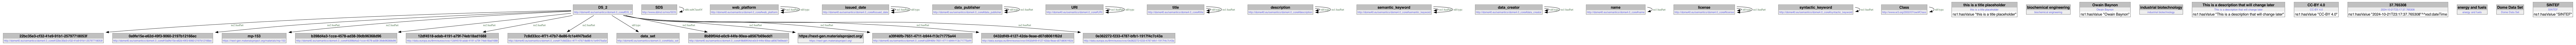

In [28]:
vis(DS99)

In [88]:
q = """
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX domeES: <http://dome40.eu/semantics/dome4.0_core#> 

    SELECT ?s ?p ?o ?oLabel
    WHERE {
        ?s ?p ?o .
        ?o rdfs:label ?oLabel .    
        ?o rdfs:label "medical engineering" .
        }
"""


In [89]:
r=gc.query(q)

In [90]:
for i in r:
    print(i)
    

(rdflib.term.URIRef('http://dome40.eu/semantics/dome4.0_core#DS_4'), rdflib.term.URIRef('http://dome40.eu/semantics/dome4.0_core#hasPart'), rdflib.term.URIRef('http://data.europa.eu/8mn/euroscivoc/742439ad-5d62-4e2d-bd77-0eb7caaa75f4'), rdflib.term.Literal('medical engineering'))
